In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.preprocessing as spp
import sklearn.decomposition as sdc

/usr/lib64/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
data=pd.read_csv("vehicules.data",sep=' ')
carNames=data['Modele']
x=data.iloc[:,1:].values

In [3]:
n,p=x.shape
print(n,p)

18 6


In [4]:
sc=spp.StandardScaler()
xnorm=sc.fit_transform(x.astype(float))

np.mean(xnorm,axis=0)
np.std(xnorm,axis=0)

array([1., 1., 1., 1., 1., 1.])

In [5]:
acp=sdc.PCA()
coord=acp.fit_transform(xnorm)

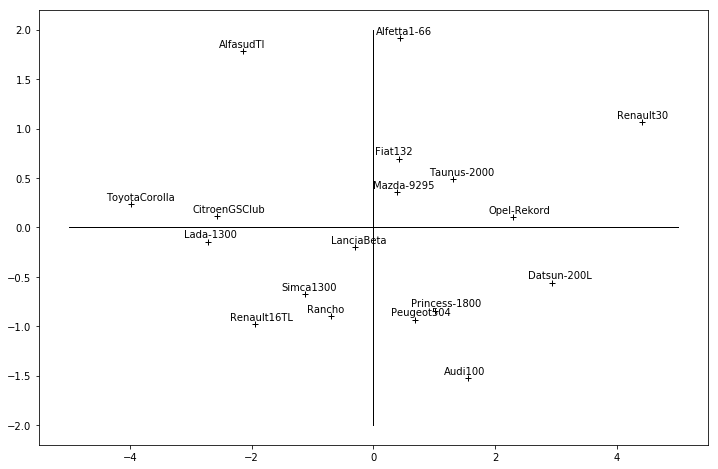

In [6]:
plt.figure(figsize=(12,8))

plt.plot(coord[:,0],coord[:,1],'+k')
for i in range(n):
    plt.annotate(carNames[i],(coord[i,0]-0.4,coord[i,1]+0.04))

plt.plot([-5,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,2],color='black',linestyle='-',linewidth=1);

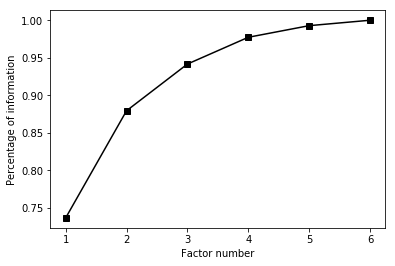

In [7]:
#acp.explained_variance_
#acp.explained_variance_ratio_
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_),'-sk')
plt.ylabel("Percentage of information")
plt.xlabel("Factor number");

In [10]:
matCor=np.zeros((p,p))

for i in range(p):
    for j in range(p):
        correlation=np.corrcoef(xnorm[:,i],coord[:,j])
        matCor[i,j]=correlation[0,1]

dataCor=pd.DataFrame({'id':data.columns[1:],'COR_1':matCor[:,0],'COR_2':matCor[:,1]})

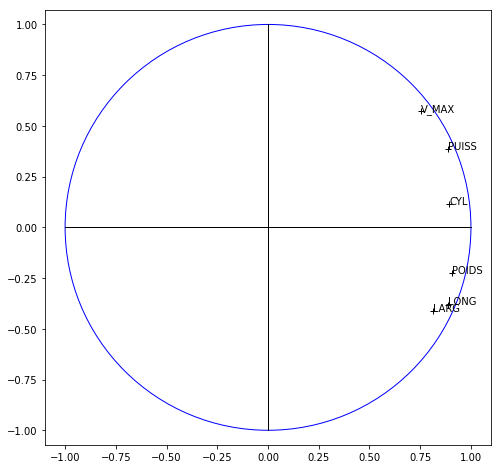

In [21]:
axisCircle=[1,2]

fig,axes=plt.subplots(figsize=(8,8))

plt.plot(matCor[:,0],matCor[:,1],'+k') # points
for j in range(p):
    plt.annotate(data.columns[j+1],(matCor[j,0],matCor[j,1]))

plt.plot([-1,1],[0,0],color='k',linestyle='-',linewidth=1) # axis
plt.plot([0,0],[-1,1],color='k',linestyle='-',linewidth=1)

cercle=plt.Circle((0,0),1,color='blue',fill=False) # circle
axes.add_artist(cercle)

plt.axis('equal')
axes.set_xlim(-1.1,1.1)
axes.set_ylim(-1.1,1.1);

In [27]:
x2=np.array([[2664,136,472,177,1410,180],[1288,74,414,157,915,160]],np.float)
x2norm=sc.transform(x2)

coord2c0=np.dot(x2norm,acp.components_[0])
coord2c1=np.dot(x2norm,acp.components_[1])


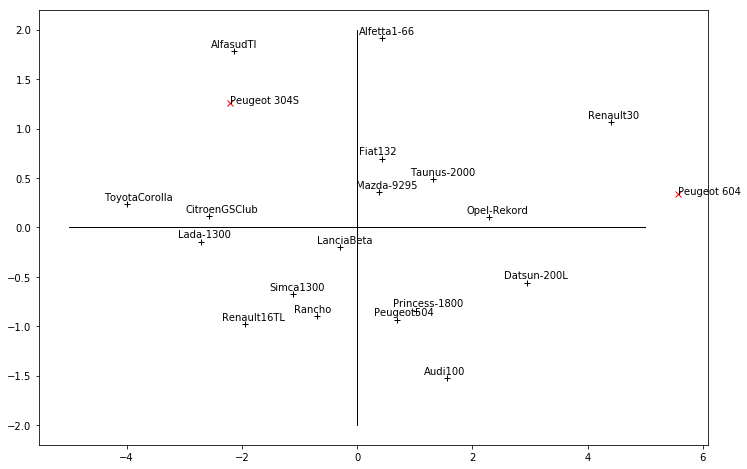

In [28]:
plt.figure(figsize=(12,8))

plt.plot(coord[:,0],coord[:,1],'+k')
for i in range(n):
    plt.annotate(carNames[i],(coord[i,0]-0.4,coord[i,1]+0.04))

plt.plot(coord2c0,coord2c1,'xr')
plt.annotate('Peugeot 604',(coord2c0[0],coord2c1[0]))
plt.annotate('Peugeot 304S',(coord2c0[1],coord2c1[1]))
    
plt.plot([-5,5],[0,0],color='black',linestyle='-',linewidth=1)
plt.plot([0,0],[-2,2],color='black',linestyle='-',linewidth=1);